# NLP Project: Pokemon Type Predictor
## Author: Brady Lamson
## Date: Fall 2023

# Data Loading

Here we connect to kaggle and download the dataset. Note that an access token is required to run this code. 
This file also has some wack encoding, so I have to modify that to read in the file.

In [68]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.style

In [19]:
!kaggle datasets download -d cristobalmitchell/pokedex
data_path = "./data/pokemon.csv"
if not os.path.isfile(data_path):
    !unzip pokedex.zip -d data

df = pd.read_csv(data_path, sep='\t', encoding='utf-16-le')
df.head()

pokedex.zip: Skipping, found more recently modified local copy (use --force to force download)


,national_number,gen,english_name,japanese_name,primary_type,secondary_type,classification,percent_male,percent_female,height_m,...,evochain_1,evochain_2,evochain_3,evochain_4,evochain_5,evochain_6,gigantamax,mega_evolution,mega_evolution_alt,description
0,1,I,Bulbasaur,Fushigidane,grass,poison,Seed Pokémon,88.14,11.86,0.7,...,Level,Ivysaur,Level,Venusaur,NaN,NaN,NaN,NaN,NaN,There is a plant seed on its back right from t...
1,2,I,Ivysaur,Fushigisou,grass,poison,Seed Pokémon,88.14,11.86,1.0,...,Level,Ivysaur,Level,Venusaur,NaN,NaN,NaN,NaN,NaN,"When the bulb on its back grows large, it appe..."
2,3,I,Venusaur,Fushigibana,grass,poison,Seed Pokémon,88.14,11.86,2.0,...,Level,Ivysaur,Level,Venusaur,NaN,NaN,Gigantamax Venusaur,Mega Venusaur,NaN,Its plant blooms when it is absorbing solar en...
3,4,I,Charmander,Hitokage,fire,NaN,Lizard Pokémon,88.14,11.86,0.6,...,Level,Charmeleon,Level,Charizard,NaN,NaN,NaN,NaN,NaN,It has a preference for hot things. When it ra...
4,5,I,Charmeleon,Lizardo,fire,NaN,Flame Pokémon,88.14,11.86,1.1,...,Level,Charmeleon,Level,Charizard,NaN,NaN,NaN,NaN,NaN,"It has a barbaric nature. In battle, it whips ..."


# Data Exploration

In [22]:
df.iloc[0]

national_number                                                       1
gen                                                                   I
english_name                                                  Bulbasaur
japanese_name                                               Fushigidane
primary_type                                                      grass
secondary_type                                                   poison
classification                                             Seed Pokémon
percent_male                                                      88.14
percent_female                                                    11.86
height_m                                                            0.7
weight_kg                                                           6.9
capture_rate                                                         45
base_egg_steps                                                     5120
hp                                                              

## Removing unnecessary columns

Seems we can par this down a lot and remove a ton of the columns. We only really care about a few of them, like `english_name`, `primary_type`, `secondary_type` and `description`. 

In [25]:
columns_to_keep = ['english_name', 'primary_type', 'secondary_type', 'description']
df = df[columns_to_keep]
df.head()

,english_name,primary_type,secondary_type,description
0,Bulbasaur,grass,poison,There is a plant seed on its back right from t...
1,Ivysaur,grass,poison,"When the bulb on its back grows large, it appe..."
2,Venusaur,grass,poison,Its plant blooms when it is absorbing solar en...
3,Charmander,fire,NaN,It has a preference for hot things. When it ra...
4,Charmeleon,fire,NaN,"It has a barbaric nature. In battle, it whips ..."


## Checking Types and Frequency

In [50]:
num_types = len(df.primary_type.unique())
y_axis = np.arange(num_types)
primary_counts = (
    df
    .primary_type
    .value_counts()
    .rename("primary_counts")
)
secondary_counts = (
    df
    .secondary_type
    .value_counts()
    .rename("secondary_counts")
)
count_df = (
    pd.concat([primary_counts, secondary_counts], axis=1)
    .reset_index(names="type")
)
count_df

,type,primary_counts,secondary_counts
0,water,123,18
1,normal,109,6
2,grass,86,22
3,bug,75,9
4,fire,58,16
5,psychic,58,35
6,rock,50,15
7,electric,49,9
8,dark,36,25
9,fighting,36,26


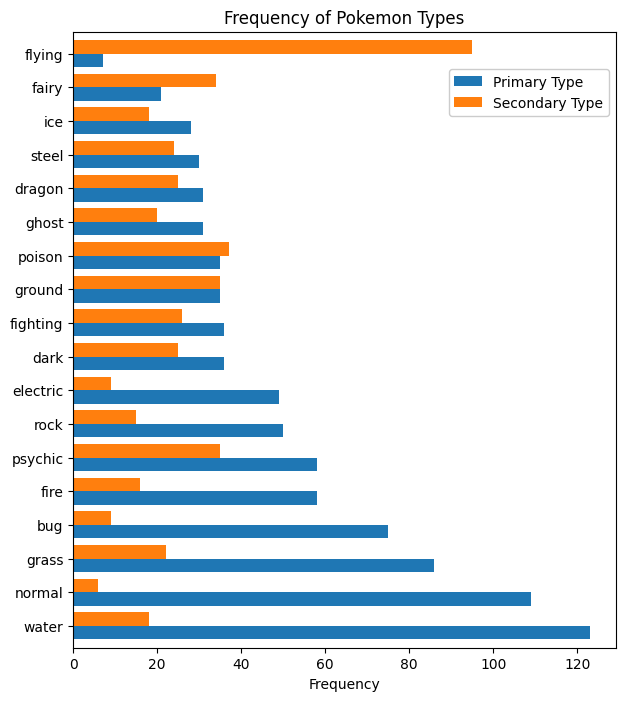

In [123]:
matplotlib.style.use("default")
ax = (
    count_df
    .plot
    .barh(
        x='type',
        figsize=(7,8),
        title="Frequency of Pokemon Types",
        xlabel="Frequency",
        ylabel="",
        # grid=True,
        width=0.8
    )
    .legend(
        ['Primary Type', 'Secondary Type'],
        loc="upper right",
        bbox_to_anchor=(1,0.95),
        fancybox=True, 
        framealpha=1,
        ncol=1
    )
)